In [7]:
import geopandas as gpd

aoi = gpd.read_file("map_ukraine.geojson")
aoi

,geometry
0,"POLYGON ((33.40965 46.84998, 33.24672 46.92351..."


In [11]:
aoi.centroid.iloc[0].coords[0]

/tmp/ipykernel_15826/3733139136.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aoi.centroid.iloc[0].coords[0]


(32.79912830994258, 46.67747714574031)

In [2]:
import ee
# ee.Authenticate()
ee.Initialize()

In [3]:
from datetime import datetime, timezone
from georeader.readers import ee_query
tz = timezone.utc
start_period = datetime.strptime('2023-05-15',"%Y-%m-%d").replace(tzinfo=tz)
end_period = datetime.now(tz=tz)

flood_images_gee, flood_collection = ee_query.query(
    area=aoi.iloc[0].geometry, 
    date_start=start_period, 
    date_end=end_period,                                                   
    producttype="both", 
    return_collection=True, 
    add_s2cloudless=False)

flood_images_gee

,geometry,cloudcoverpercentage,crs_product,gee_id,system:time_start,collection_name,utcdatetime,overlappercentage,solardatetime,solarday,localdatetime,satellite
title,,,,,,,,,,,,
LC08_L1TP_179028_20230516_20230523_02_T1,"POLYGON ((33.52836 46.41243, 33.55840 46.48761...",61.270000,EPSG:32636,1_LC08_179028_20230516,1684226237270,LANDSAT/LC08/C02/T1_RT_TOA,2023-05-16 08:37:17.270000+00:00,74.524035,2023-05-16 10:45:40.542416+00:00,2023-05-16,2023-05-16 08:37:17.270000+00:00,LC08
S2A_MSIL1C_20230516T083601_N0509_R064_T36TWS_20230516T104108,"POLYGON ((32.99961 46.95372, 32.99961 46.95371...",31.396070,EPSG:32636,20230516T083601_20230516T084107_T36TWS,1684226842239,COPERNICUS/S2_HARMONIZED,2023-05-16 08:47:22.239000+00:00,28.918845,2023-05-16 11:02:13.716887+00:00,2023-05-16,2023-05-16 08:47:22.239000+00:00,S2A
S2A_MSIL1C_20230516T083601_N0509_R064_T36TVS_20230516T104108,"POLYGON ((32.95310 46.95375, 32.95309 46.95373...",80.997795,EPSG:32636,20230516T083601_20230516T084107_T36TVS,1684226846205,COPERNICUS/S2_HARMONIZED,2023-05-16 08:47:26.205000+00:00,26.386758,2023-05-16 10:59:11.379562+00:00,2023-05-16,2023-05-16 08:47:26.205000+00:00,S2A
LC09_L1TP_178028_20230517_20230517_02_T1,"POLYGON ((32.73552 47.08919, 32.73249 47.08078...",13.040000,EPSG:32636,2_LC09_178028_20230517,1684312285995,LANDSAT/LC09/C02/T1_TOA,2023-05-17 08:31:25.995000+00:00,74.021279,2023-05-17 10:45:58.409065+00:00,2023-05-17,2023-05-17 08:31:25.995000+00:00,LC09
S2A_MSIL1C_20230519T084601_N0509_R107_T36TVS_20230519T104952,"POLYGON ((31.70898 45.95835, 31.70900 45.95835...",29.087372,EPSG:32636,20230519T084601_20230519T085121_T36TVS,1684486644078,COPERNICUS/S2_HARMONIZED,2023-05-19 08:57:24.078000+00:00,83.282631,2023-05-19 11:07:02.975835+00:00,2023-05-19,2023-05-19 08:57:24.078000+00:00,S2A
S2A_MSIL1C_20230519T084601_N0509_R107_T36TWS_20230519T104952,"POLYGON ((32.99968 46.95376, 32.99961 46.95373...",33.778362,EPSG:32636,20230519T084601_20230519T085121_T36TWS,1684486639497,COPERNICUS/S2_HARMONIZED,2023-05-19 08:57:19.497000+00:00,28.918853,2023-05-19 11:11:49.028910+00:00,2023-05-19,2023-05-19 08:57:19.497000+00:00,S2A
S2B_MSIL1C_20230521T083609_N0509_R064_T36TWS_20230521T091527,"POLYGON ((32.99961 46.95372, 32.99961 46.95371...",71.714981,EPSG:32636,20230521T083609_20230521T083626_T36TWS,1684658846091,COPERNICUS/S2_HARMONIZED,2023-05-21 08:47:26.091000+00:00,28.918845,2023-05-21 11:02:17.568887+00:00,2023-05-21,2023-05-21 08:47:26.091000+00:00,S2B
S2B_MSIL1C_20230521T083609_N0509_R064_T36TVS_20230521T091527,"POLYGON ((32.60090 45.96495, 32.60092 45.96494...",28.927847,EPSG:32636,20230521T083609_20230521T083626_T36TVS,1684658850028,COPERNICUS/S2_HARMONIZED,2023-05-21 08:47:30.028000+00:00,26.804040,2023-05-21 10:59:14.795052+00:00,2023-05-21,2023-05-21 08:47:30.028000+00:00,S2B
LC09_L1TP_179027_20230524_20230524_02_T1,"POLYGON ((34.06451 47.72261, 34.07966 47.75891...",39.600000,EPSG:32636,2_LC09_179027_20230524,1684917426063,LANDSAT/LC09/C02/T1_TOA,2023-05-24 08:37:06.063000+00:00,83.051934,2023-05-24 10:47:38.648479+00:00,2023-05-24,2023-05-24 08:37:06.063000+00:00,LC09


In [4]:
flood_images_gee.groupby(["solarday","satellite"])[["cloudcoverpercentage"]].agg(["count","mean"])

cloudcoverpercentage           
                                    count       mean
solarday   satellite                                
2023-05-16 LC08                         1  61.270000
           S2A                          2  56.196933
2023-05-17 LC09                         1  13.040000
2023-05-19 S2A                          2  31.432867
2023-05-21 S2B                          2  50.321414
2023-05-24 LC09                         2  36.845000
           S2B                          2  28.589800
2023-05-25 LC08                         1  42.510000
2023-05-26 S2A                          1  55.004718
2023-05-29 S2A                          2  73.391209
2023-05-31 S2B                          2  75.062169
2023-06-01 LC08                         2   2.070000
2023-06-02 LC09                         1  16.040000
2023-06-03 S2B                          2   4.788626
2023-06-05 S2A                          2   0.000000
2023-06-08 S2A                          2  95.540035
2023-06-09 LC09                         2   7.760000
2023-06-10 LC08                         1  93.430000
           S2B                          2  99.942521

In [5]:
import geemap.foliumap as geemap
import folium

tl = folium.TileLayer(
            tiles="https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
            attr='Google',
            name="Google Satellite",
            overlay=True,
            control=True,
            max_zoom=22,
        )

m = geemap.Map(location=aoi.centroid.iloc[0].coords[0][-1::-1], 
               zoom_start=8)

tl.add_to(m)

flood_images_gee["localdatetime_str"] = flood_images_gee["localdatetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
showcolumns = ["geometry","overlappercentage","cloudcoverpercentage", "localdatetime_str","solarday","satellite"]
colors = ["#ff7777", "#fffa69", "#8fff84", "#52adf1", "#ff6ac2","#1b6d52", "#fce5cd","#705334"]
   
# Add the flooding data
for i, ((day,satellite), images_day) in enumerate(flood_images_gee.groupby(["solarday","satellite"])):
    images_day[showcolumns].explore(
        m=m, 
        name=f"{satellite}: {day} outline", 
        color=colors[i % len(colors)], 
        show=False)

# Add the flooding data
for (day, satellite), images_day in flood_images_gee.groupby(["solarday", "satellite"]):    
    image_col_day_sat = flood_collection.filter(ee.Filter.inList("title", images_day.index.tolist()))    
    bands = ["B11","B8","B4"] if satellite.startswith("S2") else ["B6","B5","B4"]
    m.addLayer(image_col_day_sat, 
               {"min":0, "max":3000 if satellite.startswith("S2") else 0.3, "bands": bands},
               f"{satellite}: {day}",
               False)

aoi.explore(style_kwds={"fillOpacity": 0}, color="black", name="AoI", m=m)
folium.LayerControl(collapsed=False).add_to(m)
m

/tmp/ipykernel_15826/1031805691.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = geemap.Map(location=aoi.centroid.iloc[0].coords[0][-1::-1],


In [6]:
date_pre = "2023-06-03"
pre_flood = flood_images_gee[flood_images_gee.solarday == date_pre]

date_post = "2023-06-09"
post_flood = flood_images_gee[flood_images_gee.solarday == date_post]
post_flood

,geometry,cloudcoverpercentage,crs_product,gee_id,system:time_start,collection_name,utcdatetime,overlappercentage,solardatetime,solarday,localdatetime,satellite,localdatetime_str
title,,,,,,,,,,,,,
LC09_L1TP_179027_20230609_20230610_02_T1,"POLYGON ((34.15880 48.01402, 34.18380 48.07337...",1.84,EPSG:32636,2_LC09_179027_20230609,1686299822023,LANDSAT/LC09/C02/T1_TOA,2023-06-09 08:37:02.023000+00:00,83.975088,2023-06-09 10:47:27.988575+00:00,2023-06-09,2023-06-09 08:37:02.023000+00:00,LC09,2023-06-09 08:37:02
LC09_L1TP_179028_20230609_20230610_02_T1,"POLYGON ((33.59913 46.65399, 33.60113 46.65934...",13.68,EPSG:32636,2_LC09_179028_20230609,1686299845905,LANDSAT/LC09/C02/T1_TOA,2023-06-09 08:37:25.905000+00:00,74.133281,2023-06-09 10:45:43.074479+00:00,2023-06-09,2023-06-09 08:37:25.905000+00:00,LC09,2023-06-09 08:37:25


In [37]:
from georeader.readers import S2_SAFE_reader
from georeader.save import save_cog
from georeader import window_utils, mosaic
from georeader.plot import show
from georeader.rasterio_reader import RasterioReader
import os

dir_cache = "cache_s2"
os.makedirs(dir_cache, exist_ok=True)


def mosaic_s2(products, polygon, channels):
    products_read = products.index
    s2objs = []
    for product in products_read:
        s2_safe_folder = S2_SAFE_reader.s2_public_bucket_path(product+".SAFE", check_exists=False)
        s2obj = S2_SAFE_reader.s2loader(s2_safe_folder, out_res=10, bands=channels)
        s2obj = s2obj.cache_product_to_local_dir(dir_cache)
        s2objs.append(s2obj)
    
    polygon_read_dst_crs = window_utils.polygon_to_crs(polygon, 
                                                       crs_polygon="EPSG:4326", dst_crs=s2objs[0].crs)
    
    data_memory = mosaic.spatial_mosaic(s2objs, polygon=polygon_read_dst_crs, dst_crs= s2objs[0].crs)
    
    return data_memory

channels = S2_SAFE_reader.BANDS_S2_L1C
tiff_pre = f"{date_pre}.tif"
if not os.path.exists(tiff_pre):
    pre_flood_memory = mosaic_s2(pre_flood, aoi.iloc[0].geometry,channels)
    save_cog(pre_flood_memory, tiff_pre, descriptions=S2_SAFE_reader.BANDS_S2_L1C)
else:
    pred_flood = RasterioReader(tiff_pre)
    channels = pred_flood.descriptions
    pre_flood_memory = pred_flood.load()

tiff_post = f"{date_post}.tif"
if not os.path.exists(tiff_post):
    post_flood_memory = mosaic_s2(post_flood, aoi.iloc[0].geometry,channels)
    save_cog(post_flood_memory, tiff_post, descriptions=S2_SAFE_reader.BANDS_S2_L1C)
else:
    post_flood = RasterioReader(tiff_post)
    channels = post_flood.descriptions
    post_flood_memory = post_flood.load()


In [30]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/nema-floodmapper-2022-51b64bdd169d.json"

In [70]:
from ml4floods.scripts.inference import load_inference_function, vectorize_outputv1
from ml4floods.data import utils
utils.REQUESTER_PAYS_DEFAULT = False

In [32]:
%%time

model_path = "gs://ml4floods_nema/0_DEV/2_Mart/2_MLModelMart/WF2_unetv2_bgriswirs/"

inference_function, config = load_inference_function(model_path, "cpu", max_tile_size=1_024,
                                                         th_water=.7,
                                                         collection_name="S2",
                                                         disable_pbar=False,
                                                         distinguish_flood_traces=True)


Loaded model weights: gs://ml4floods_nema/0_DEV/2_Mart/2_MLModelMart/WF2_unetv2_bgriswirs/model.pt
Getting model inference function


In [33]:
config.data_params.channel_configuration

'bgriswirs'

In [38]:
from ml4floods.models.model_setup import get_channel_configuration_bands
channels_model = get_channel_configuration_bands(
                config.data_params.channel_configuration,
                collection_name="S2", as_string=True)
channels_model = S2_SAFE_reader.normalize_band_names(channels_model)
channels_model

['B02', 'B03', 'B04', 'B08', 'B11', 'B12']

In [41]:
index_channels_model = [channels.index(c) for c in channels_model]
index_channels_model

[1, 2, 3, 7, 11, 12]

In [63]:
%%time
import torch
import numpy as np
from georeader.geotensor import GeoTensor

def predict(input_tensor):
    input_tensor = input_tensor.astype(np.float32)
    input_tensor = input_tensor.isel({"band": index_channels_model})
    torch_inputs = torch.tensor(np.nan_to_num(input_tensor.values))
    return inference_function(torch_inputs)

postflood_pred = f"{date_post}_pred.tif"
if not os.path.exists(postflood_pred):
    prediction_postflood, prediction_postflood_cont  = predict(post_flood_memory)
    prediction_postflood_raster = GeoTensor(prediction_postflood.numpy(), transform=post_flood_memory.transform,
                                            fill_value_default=0, crs=post_flood_memory.crs)
    save_cog(prediction_postflood_raster, postflood_pred, descriptions=["pred"], 
             tags={"0":"invalid", "1": "land", "2":"water", "3":"cloud", "4":"flood_trace"})

preflood_pred = f"{date_pre}_pred.tif"
if not os.path.exists(preflood_pred):
    prediction_preflood, prediction_preflood_cont = predict(pre_flood_memory)
    # Remove flood traces from pre-flood
    prediction_preflood[prediction_preflood==4] = 1
    
    prediction_preflood_raster = GeoTensor(prediction_preflood.numpy(), transform=pre_flood_memory.transform,
                                           fill_value_default=0, crs=pre_flood_memory.crs)
    save_cog(prediction_preflood_raster, preflood_pred, descriptions=["pred"], 
             tags={"0":"invalid", "1": "land", "2":"water", "3":"cloud", "4":"flood_trace"})


CPU times: user 3.06 s, sys: 104 ms, total: 3.17 s
Wall time: 3.15 s


In [67]:
prediction_preflood_raster.values[prediction_preflood_raster.values==4] = 1

Text(0.5, 1.0, '2023-06-03 floodmap')

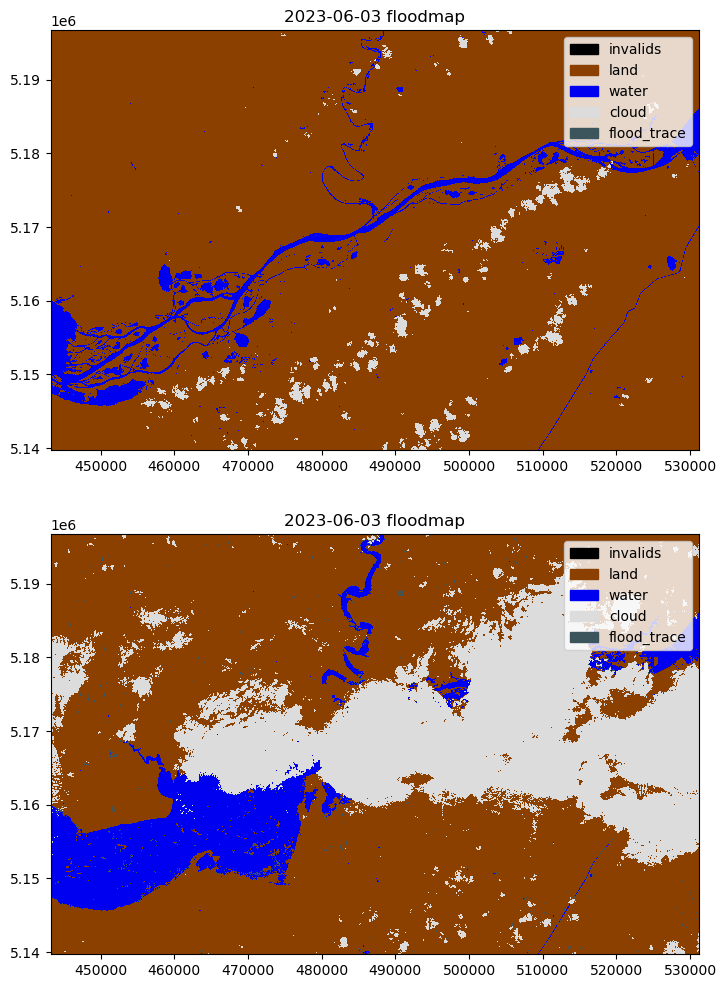

In [68]:
from georeader import plot
import matplotlib.pyplot as plt

COLORS_PRED = np.array([[0, 0, 0], # 0: invalid
                       [139, 64, 0], # 1: land
                       [0, 0, 240], # 2: water
                       [220, 220, 220], # 3: cloud
                       [60, 85, 92]], # 5: flood_trace
                    dtype=np.float32) / 255

fig, ax = plt.subplots(2,1,figsize=(16,12),squeeze=False)
plot.plot_segmentation_mask(prediction_preflood_raster, COLORS_PRED, ax=ax[0,0],
                            interpretation_array=["invalids", "land", "water", "cloud", "flood_trace"])

ax[0,0].set_title(f"{date_pre} floodmap")

plot.plot_segmentation_mask(prediction_postflood_raster, COLORS_PRED, ax=ax[1,0],
                            interpretation_array=["invalids", "land", "water", "cloud", "flood_trace"])

ax[1,0].set_title(f"{date_pre} floodmap")

In [72]:
from ml4floods.scripts import inference
from imp import reload
reload(inference)
from ml4floods.scripts.inference import load_inference_function, vectorize_outputv1

/tmp/ipykernel_13890/3622119277.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [73]:
preflood_shape = vectorize_outputv1(prediction_preflood_raster.values, 
                                    prediction_preflood_raster.crs, 
                                    prediction_preflood_raster.transform)
postflood_shape = vectorize_outputv1(prediction_postflood_raster.values, 
                                     prediction_postflood_raster.crs, 
                                     prediction_postflood_raster.transform)
postflood_shape

,geometry,id,class
0,"POLYGON ((443240.000 5196680.000, 443240.000 5...",0,area_imaged
1,"POLYGON ((465850.000 5195350.000, 465850.000 5...",1,water
2,"POLYGON ((475280.000 5195380.000, 475310.000 5...",2,water
3,"POLYGON ((485330.000 5194260.000, 485370.000 5...",3,water
4,"POLYGON ((464250.000 5190620.000, 464340.000 5...",4,water
...,...,...,...
2647,"POLYGON ((486030.000 5140130.000, 486050.000 5...",2647,flood_trace
2648,"POLYGON ((508590.000 5139910.000, 508800.000 5...",2648,flood_trace
2649,"POLYGON ((463590.000 5139920.000, 463650.000 5...",2649,flood_trace
2650,"POLYGON ((486460.000 5139950.000, 486470.000 5...",2650,flood_trace


Text(0.5, 1.0, '2023-06-08 floodmap')

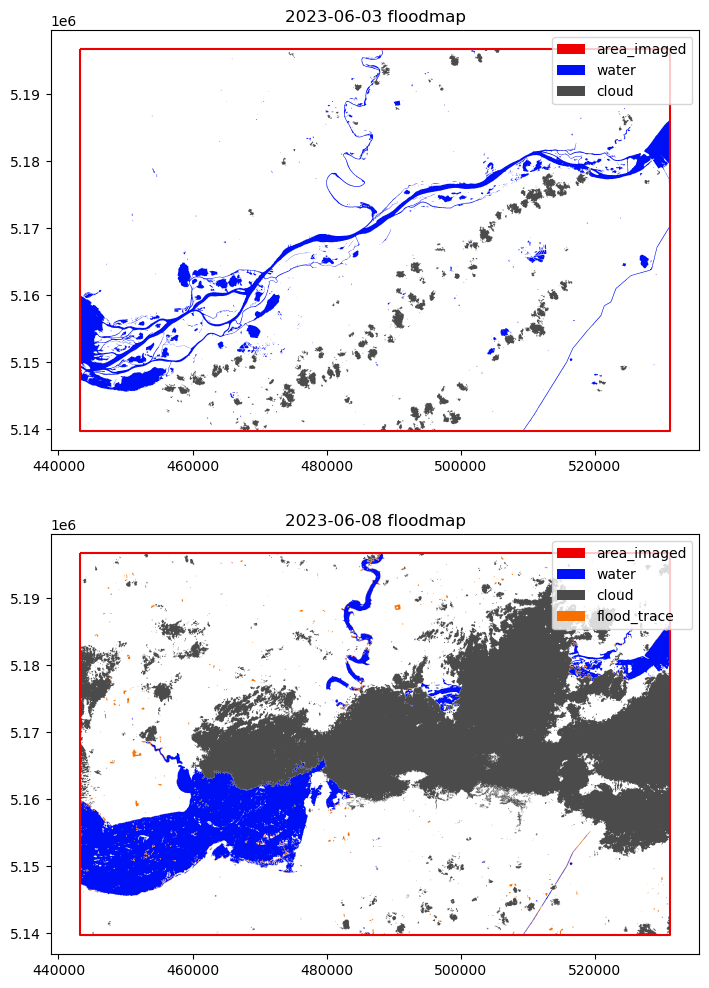

In [79]:
from ml4floods.visualization import plot_utils

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
plot_utils.plot_floodmap(preflood_shape, ax=ax[0])
ax[0].set_title(f"{date_pre} floodmap")
plot_utils.plot_floodmap(postflood_shape, ax=ax[1])
ax[1].set_title(f"{date_post} floodmap")

/home/gonzalo/git/ml4floods/ml4floods/models/postprocess.py:181: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if area_missing_or_cloud.type == "GeometryCollection":


<Axes: >

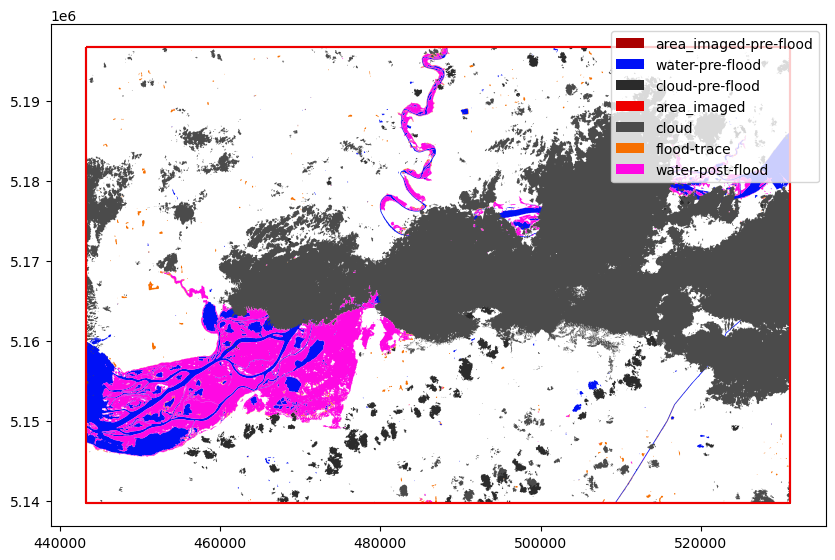

In [78]:
from ml4floods.models import postprocess
prepost_shape = postprocess.compute_pre_post_flood_water(postflood_shape, preflood_shape)
plot_utils.plot_floodmap(prepost_shape)

In [80]:
preflood_shape.to_file('Ukraine_dam.gpkg', driver='GPKG', layer=f'p{date_pre}')
postflood_shape.to_file('Ukraine_dam.gpkg', driver='GPKG', layer=f'p{date_post}')
prepost_shape.to_file('Ukraine_dam.gpkg', driver='GPKG', layer=f'prepost_{date_pre}_{date_post}')